<a href="https://colab.research.google.com/github/PraneethReddy1332/software-Engineering-lab/blob/main/weather_model_increment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Running Incremental Model...


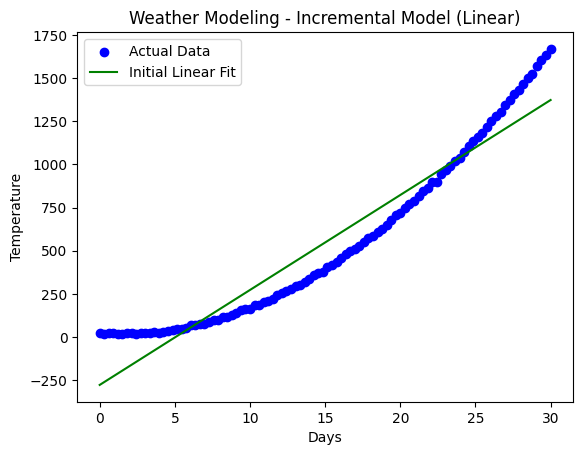

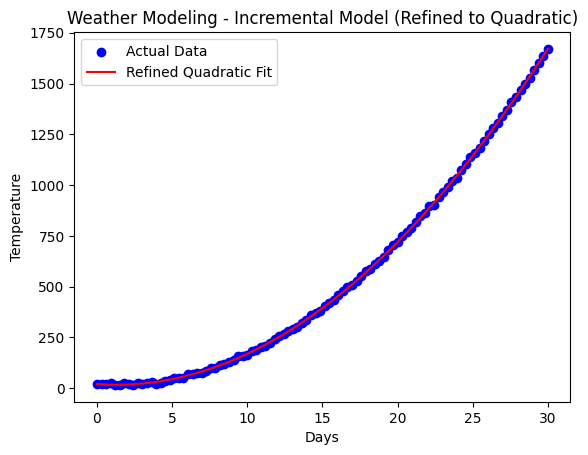

Incremental Model Coefficients (a, b, c): [ 2.00407235 -5.09918177 19.74061824]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Define the weather data collection phase (Waterfall Model)
def collect_weather_data():
    # Simulating synthetic data for weather (temperature vs. time)
    np.random.seed(42)
    days = np.linspace(0, 30, 100)  # 30 days of data
    temperatures = 2 * days**2 - 5 * days + 20 + np.random.normal(0, 5, days.shape)
    return days, temperatures

# Define the training phase (Quadratic Model Fitting)
def train_model(days, temperatures):
    # Create a quadratic feature for days
    X = np.column_stack((days**2, days, np.ones(days.shape)))  # X = [x^2, x, 1] for quadratic model
    coefs = np.linalg.lstsq(X, temperatures, rcond=None)[0]  # Solve for a, b, c using least squares
    return coefs

# Define the prediction phase
def predict_weather(days, coefs):
    # Use the trained model to predict temperatures
    a, b, c = coefs
    predicted_temps = a * days**2 + b * days + c
    return predicted_temps

# Incremental Model Implementation (step by step refinement)
def weather_model_incremental():
    # Step 1: Collect Data
    days, temperatures = collect_weather_data()

    # Step 2: Initial prediction (assuming linear model first, then refine to quadratic)
    X = np.column_stack((days, np.ones(days.shape)))  # Linear model X = [x, 1]
    linear_coefs = np.linalg.lstsq(X, temperatures, rcond=None)[0]
    predicted_linear = linear_coefs[0] * days + linear_coefs[1]

    # Plot initial linear fit
    plt.scatter(days, temperatures, color='blue', label='Actual Data')
    plt.plot(days, predicted_linear, color='green', label='Initial Linear Fit')
    plt.title("Weather Modeling - Incremental Model (Linear)")
    plt.xlabel("Days")
    plt.ylabel("Temperature")
    plt.legend()
    plt.show()

    # Step 3: Refine to quadratic model
    coefs = train_model(days, temperatures)
    predicted_quadratic = predict_weather(days, coefs)

    # Plot refined quadratic fit
    plt.scatter(days, temperatures, color='blue', label='Actual Data')
    plt.plot(days, predicted_quadratic, color='red', label='Refined Quadratic Fit')
    plt.title("Weather Modeling - Incremental Model (Refined to Quadratic)")
    plt.xlabel("Days")
    plt.ylabel("Temperature")
    plt.legend()
    plt.show()

    print("Incremental Model Coefficients (a, b, c):", coefs)

# Main Execution
if __name__ == "__main__":
    print("\nRunning Incremental Model...")
    weather_model_incremental()
